In [ ]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")

Saving hotel_bookings.csv to hotel_bookings.csv


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 86906 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86906 non-null  object 
 1   is_canceled                     86906 non-null  int64  
 2   lead_time                       86906 non-null  int64  
 3   arrival_date_year               86906 non-null  int64  
 4   arrival_date_month              86906 non-null  object 
 5   arrival_date_week_number        86906 non-null  int64  
 6   arrival_date_day_of_month       86906 non-null  int64  
 7   stays_in_weekend_nights         86906 non-null  int64  
 8   stays_in_week_nights            86906 non-null  int64  
 9   adults                          86906 non-null  int64  
 10  children                        86906 non-null  float64
 11  babies                          86906 non-null  int64  
 12  country               

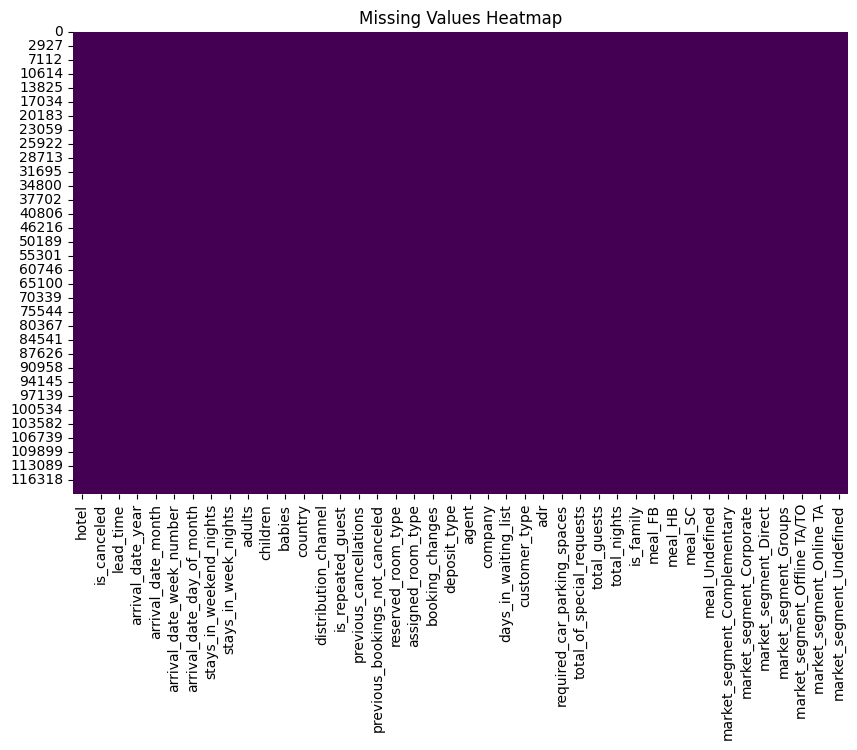

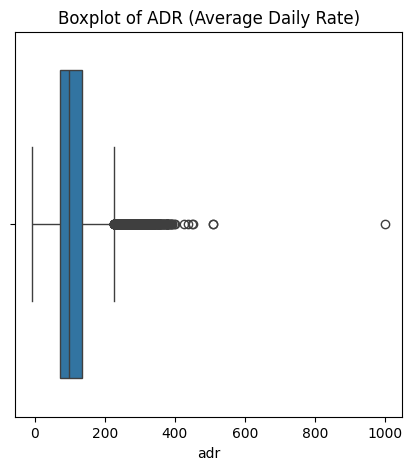

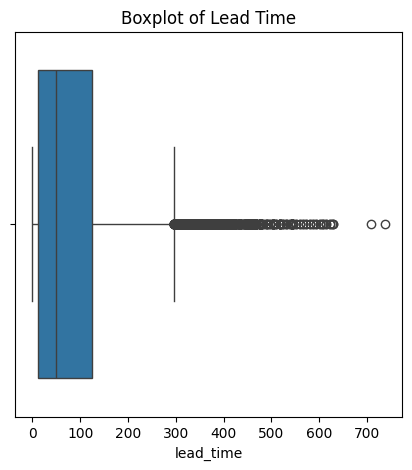

Final Train Shape: (69505, 42)
Final Test Shape: (17377, 42)


In [ ]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


#check Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df["adr"])
plt.title("Boxplot of ADR (Average Daily Rate)")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df["lead_time"])
plt.title("Boxplot of Lead Time")
plt.show()

#Handle Missing Values
df["company"] = df["company"].fillna("None")
df["agent"] = df["agent"].fillna(0)
df["country"] = df["country"].fillna("Unknown")
df["children"] = df["children"].fillna(df["children"].median())
#Remove duplicates
df = df.drop_duplicates()
df.loc[df["adr"] > 1000, "adr"] = 1000
if "reservation_status_date" in df.columns:
    df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], errors="coerce")
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = df["children"].apply(lambda x: 1 if x > 0 else 0)
categorical_cols = [col for col in ["meal", "market_segment"] if col in df.columns]
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
if "country" in df.columns:
    top_countries = df["country"].value_counts().nlargest(10).index
    df["country"] = df["country"].apply(lambda x: x if x in top_countries else "Other")
cols_to_drop = [col for col in ["reservation_status", "reservation_status_date"] if col in df.columns]
df = df.drop(cols_to_drop, axis=1)
#Train/Test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("Final Train Shape:", train_df.shape)
print("Final Test Shape:", test_df.shape)
